#### CLUSTERING PLAYERS BASED ON THEIR POSSESION PERCENTAGES IN VARIOUS PLAY-TYPES IN 2019 & 2020 SEASONS

In [11]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

##### Read & clean the data

In [12]:
# Read 2019 dataset
play_type_data_2019 = pd.read_csv('Data/Play_Type_2019.csv')
play_type_data_2019 = play_type_data_2019[['PLAYER','TEAM','ISOLATION_FREQ','PNR_HANDLER_FREQ','PNR_ROLL_FREQ',
                                 'TRANSITION_FREQ','POST_UP_FREQ','SPOT_UP_FREQ','HANDOFF_FREQ','CUT_FREQ']]

play_type_data_2019['Season'] = 2019

#Read 2020 dataset
play_type_data_2020 = pd.read_csv('Data/Play_Type_2020.csv')
play_type_data_2020 = play_type_data_2020[['Name','Team','Iso-freq','tra-freq','p&rh-freq','p&rr-pts','postup-freq',
                                     'spotup-freq','handoff-freq','cut-freq']]
play_type_data_2020['Season'] = 2020

play_type_data_2020 = play_type_data_2020.rename(columns={
    'Name': 'PLAYER',
    'Team': 'TEAM',
    'Iso-freq': 'ISOLATION_FREQ',
    'p&rh-freq': 'PNR_HANDLER_FREQ',
    'tra-freq': 'TRANSITION_FREQ',
    'p&rr-pts': 'PNR_ROLL_FREQ',
    'postup-freq': 'POST_UP_FREQ',
    'spotup-freq': 'SPOT_UP_FREQ',
    'handoff-freq': 'HANDOFF_FREQ',
    'cut-freq': 'CUT_FREQ'
})

# Concat both dataframes
concat_data = pd.concat([play_type_data_2019, play_type_data_2020])

# Reset the index to have a continuous index in the concatenated data
concat_data.reset_index(drop=True, inplace=True)

# Delete players with less than 0.3 total frequency
total_freq = concat_data.iloc[:, 2:-1].sum(axis=1)

concat_data = concat_data[total_freq >= 0.3]

# Create the possesions_freq dataframe (only the frequency values)

possesions_freq = concat_data.filter(regex='FREQ$', axis=1)




##### Elbow Method

c:\Users\Gabriel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Gabriel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Gabriel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Gabriel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

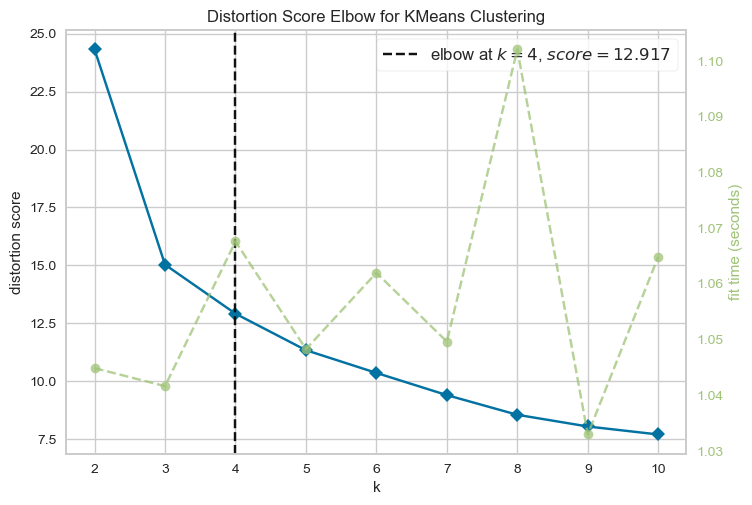

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = KMeans(n_init=10, random_state=0)
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(possesions_freq)
visualizer.show()

##### Fitting the Kmeans model and adding the new clusters to the data

In [16]:
# Fitting the model
kmeans = KMeans(n_clusters=6,n_init=10, random_state=0)
labels = kmeans.fit_predict(possesions_freq)

df_labels = pd.DataFrame(labels)

# Add the new clusters
concat_data['Cluster'] = df_labels.values

c:\Users\Gabriel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


##### Renaming the columns to visualize the data better 

In [17]:
concat_data = concat_data.rename(columns={
    "ISOLATION_FREQ": "Isolation",
    "PNR_HANDLER_FREQ": "P&R Handler",
    'PNR_ROLL_FREQ': 'P&R Roll',
    'TRANSITION_FREQ': 'Transition',
    'POST_UP_FREQ':'Post Up',
    'SPOT_UP_FREQ':'Spot Up',
    'HANDOFF_FREQ':'HandOff',
    'CUT_FREQ': 'Cut'
})

##### Creating the dataset of the new clusters with their characteristics

In [21]:
# Calculate the number of players in each cluster
cluster_counts = concat_data.groupby('Cluster')['PLAYER'].count().reset_index()

# Calculate the median frequency of each style for each cluster
estilo_columns = concat_data.columns[2:-2]
cluster_means = concat_data.groupby('Cluster')[estilo_columns].mean().reset_index()
cluster_means[estilo_columns]*=100

# Aproximate the values
cluster_means = cluster_means.round(2)

# Combine both new dataframes
result = pd.merge(cluster_counts, cluster_means, on='Cluster')

##### Saving the dataframes

In [22]:
# Save concat and result
concat_data.to_csv('Data/players_new_types.csv', index=False)
result.to_csv('Data/results_clusters.csv',index=False)